<a href="https://colab.research.google.com/github/deepakr3098-spec/Employee-Attrition-Forecasting-/blob/main/Employee_Attrition_Coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv',na_values=['na','NA','N/A','n/a',np.nan,None,'N/a','n/A'])
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# checking for  null values if present

data.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [ ]:
# checking for datatypes

data.dtypes

,0
Age,int64
Attrition,object
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


In [ ]:
# checking for duplicate values if present

data.duplicated().sum()

0

In [ ]:
# checking for rows and columns in the data

data.shape

(1470, 35)

In [ ]:
# Convert 'object' type columns to numerical representation
for col in data.select_dtypes(include=['object']):
    if data[col].nunique() < 10:  # Assuming categorical columns with less than 10 unique values
        data[col] = data[col].astype('category').cat.codes
    else:
        print(f"Column '{col}' has too many unique values to convert directly.")

# Now calculate the correlation matrix
corr = data.corr()

In [ ]:
plt.rcParams['figure.figsize'] = [12,10]

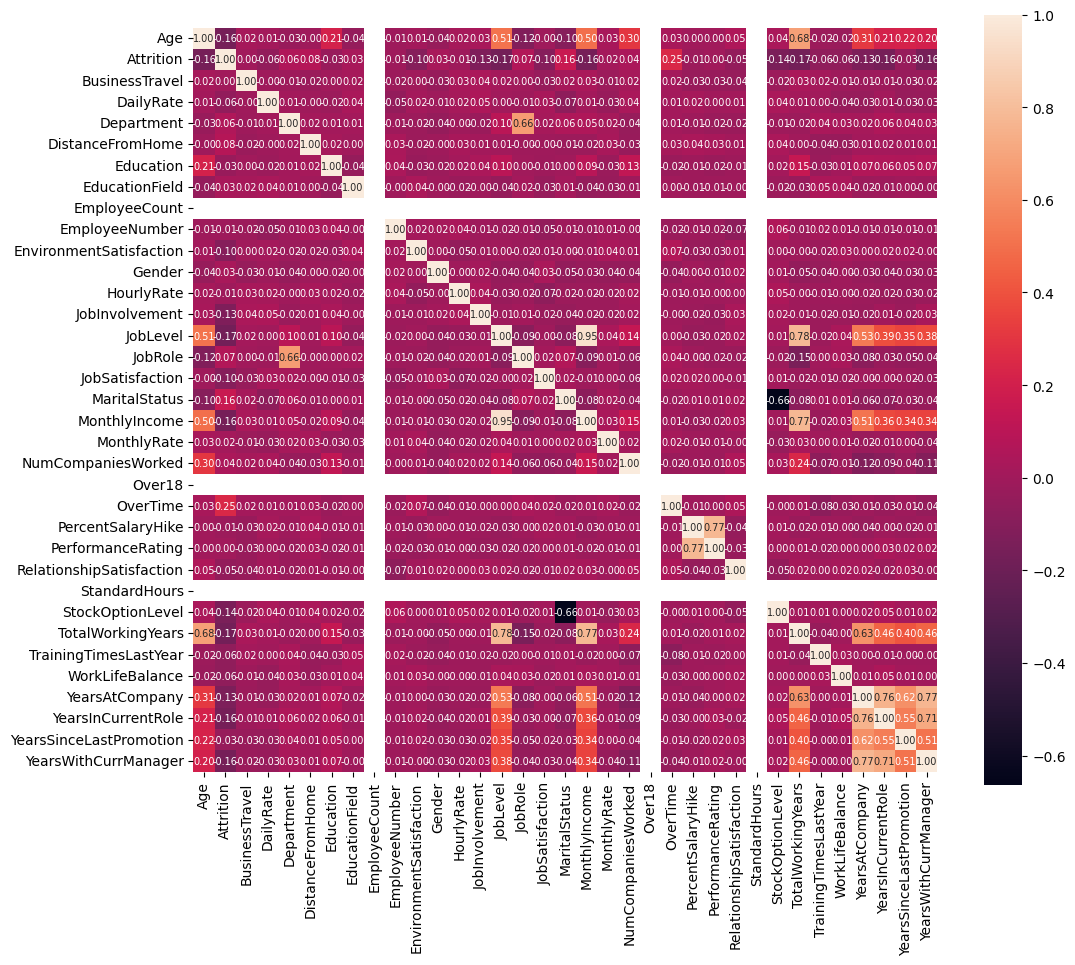

In [ ]:
sns.heatmap(corr,xticklabels=corr.index,yticklabels=corr.index,annot=True,
             annot_kws={'size':7},square=True, fmt='.2f');

In [ ]:
# there are many correlated columns present in the dataset, based on the analysis dropping the correlated variables.

data.drop(['JobLevel','TotalWorkingYears','PerformanceRating',
           'YearsInCurrentRole','YearsWithCurrManager'],axis=1,inplace=True)

In [ ]:
# they have zero variance, and hence it would be feasible to drop these columns as well.

data.drop(['EmployeeCount','StandardHours','Over18'],axis=1,inplace=True)

In [ ]:
# checking for the shape of the dataset again after dropping the columns

data.shape

(1470, 27)

In [ ]:
# doing correlation check again to if any columns are still present with correlation greater than 75%

corr = data.corr()

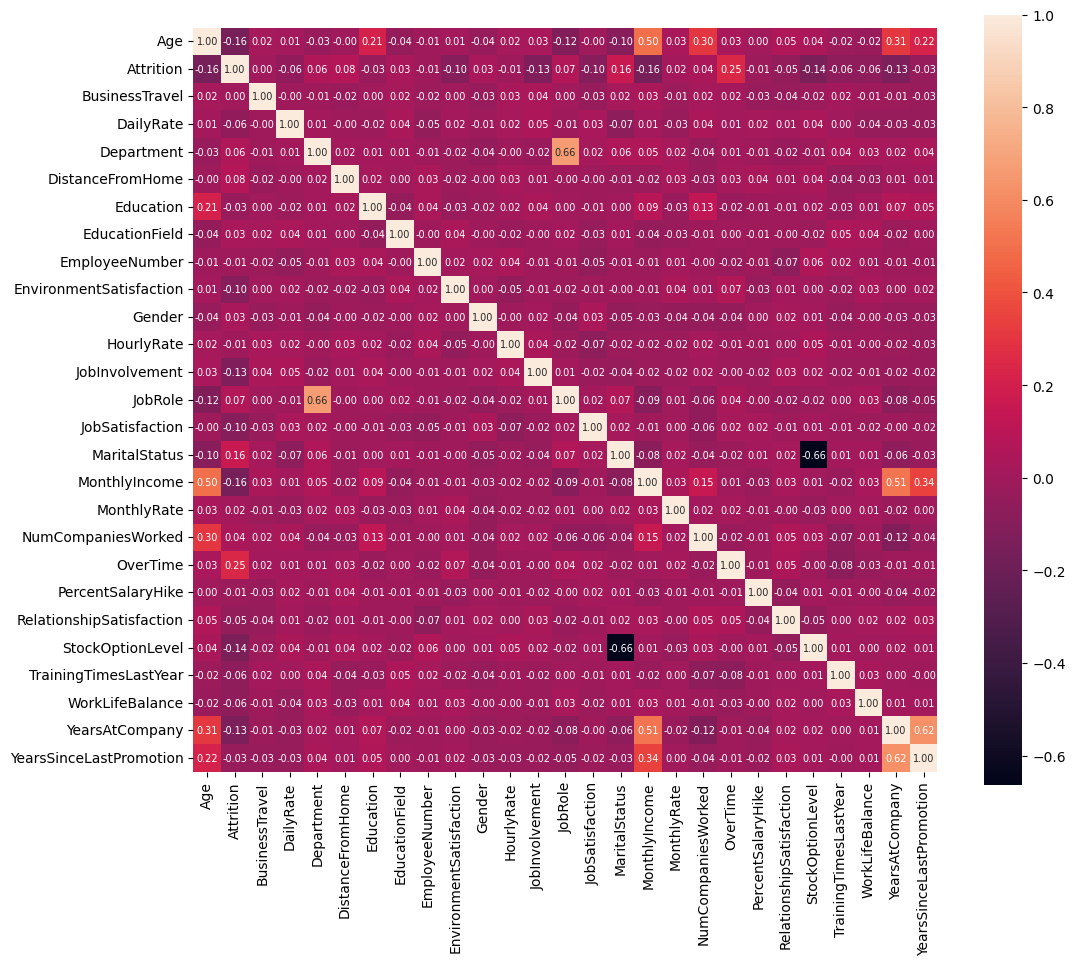

In [ ]:
sns.heatmap(corr,xticklabels=corr.index,yticklabels=corr.index,annot=True,
             annot_kws={'size':7},square=True, fmt='.2f');

In [ ]:
sns.set_style(style='whitegrid')

In [ ]:
# creating a dataset with only numerical columns

data1 = data[['Age','DailyRate','DistanceFromHome','Education','EmployeeNumber','EnvironmentSatisfaction','HourlyRate',
              'JobInvolvement','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike',
              'RelationshipSatisfaction','StockOptionLevel','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany',
              'YearsSinceLastPromotion']]

In [ ]:
# plotting the boxplots for all the numerical columns in the dataset

count = 1
plt.subplots(figsize=(40,60),dpi=300)

for i in data1.columns:
    plt.subplot(10,4,count)
    sns.boxplot(x=i,data=data1)
    plt.xlabel=(i)
    count+=1

plt.tight_layout()
plt.show()

In [ ]:
# using describe we are checking for 5 number summary in the dataset

data.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1024.865306,2.721769,...,14313.103401,2.693197,0.282993,15.209524,2.712245,0.793878,2.799320,2.761224,7.008163,2.187755
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,602.024335,1.093082,...,7117.786044,2.498009,0.450606,3.659938,1.081209,0.852077,1.289271,0.706476,6.126525,3.222430
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,2094.000000,0.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,491.250000,2.000000,...,8047.000000,1.000000,0.000000,12.000000,2.000000,0.000000,2.000000,2.000000,3.000000,0.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1020.500000,3.000000,...,14235.500000,2.000000,0.000000,14.000000,3.000000,1.000000,3.000000,3.000000,5.000000,1.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1555.750000,4.000000,...,20461.500000,4.000000,1.000000,18.000000,4.000000,1.000000,3.000000,3.000000,9.000000,3.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,2068.000000,4.000000,...,26999.000000,9.000000,1.000000,25.000000,4.000000,3.000000,6.000000,4.000000,40.000000,15.000000


In [ ]:
# treating all the outliers in the boxplots with the required percentile values, these percentile values are
# decided after careful analysis of the boxplot

upper_company_worked = int(np.percentile(data.NumCompaniesWorked,90))
upper_company_worked

data.NumCompaniesWorked = np.where(data.NumCompaniesWorked>upper_company_worked,upper_company_worked, data.NumCompaniesWorked)

In [ ]:
upper_stock = int(np.percentile(data.StockOptionLevel,90))
upper_stock

data.StockOptionLevel = np.where(data.StockOptionLevel>upper_stock,upper_stock,data.StockOptionLevel)

In [ ]:
lower_training = int(np.percentile(data.TrainingTimesLastYear,5))
lower_training

upper_training = int(np.percentile(data.TrainingTimesLastYear,87))
upper_training

data.TrainingTimesLastYear = np.clip(data.TrainingTimesLastYear,lower_training,upper_training)

In [ ]:
upper_yearsAt = int(np.percentile(data.YearsAtCompany,90))
upper_yearsAt

data.YearsAtCompany = np.where(data.YearsAtCompany>upper_yearsAt,upper_yearsAt,data.YearsAtCompany)

In [ ]:
upper_yearsProm = int(np.percentile(data.YearsSinceLastPromotion,90))
upper_yearsProm

data.YearsSinceLastPromotion = np.where(data.YearsSinceLastPromotion>upper_yearsProm
                                        ,upper_yearsProm,data.YearsSinceLastPromotion)

In [ ]:
upper_income = int(np.percentile(data.MonthlyIncome,90))
upper_income

data.MonthlyIncome = np.where(data.MonthlyIncome>upper_income,upper_income,data.MonthlyIncome)

In [ ]:
# to check for outliers if present, we will be creating a dataset along with boxplots

data2 = data[['Age','DailyRate','DistanceFromHome','Education','EmployeeNumber','EnvironmentSatisfaction','HourlyRate',
              'JobInvolvement','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike',
              'RelationshipSatisfaction','StockOptionLevel','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany',
              'YearsSinceLastPromotion']]

In [ ]:
# after outlier treatment, there are no further outliers present

count = 1
plt.subplots(figsize=(40,60),dpi=300)

for i in data1.columns:
    plt.subplot(10,4,count)
    sns.boxplot(x=i,data=data2)
    plt.xlabel=(i)
    count+=1

plt.tight_layout()
plt.show()

**Exploratory Data Analysis**

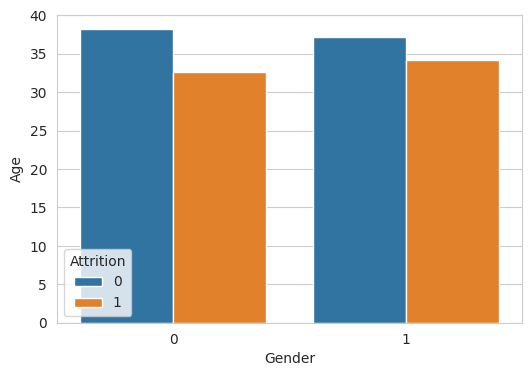

In [ ]:
# so below if observe correctly, we can see that the age group that is below 35 years are prone to leave the company more
# and if see genderwise we can see that female and male employees are almost equal in quitting the company

plt.subplots(figsize=(6,4))
sns.barplot(x='Gender',y='Age',hue='Attrition',data=data,ci=False);

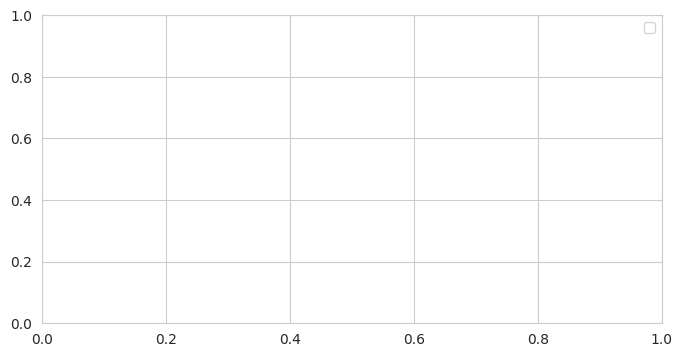

In [ ]:
# so in this graph if we observe correctly the age group between 22-32 are prone to quit the company more compared to
# other age groups.

plt.subplots(figsize=(8,4))
sns.kdeplot(data.loc[data.Attrition=='No','Age'],label='Current Employees')
sns.kdeplot(data.loc[data.Attrition=='Yes','Age'],label='Ex-Employees')
plt.legend();

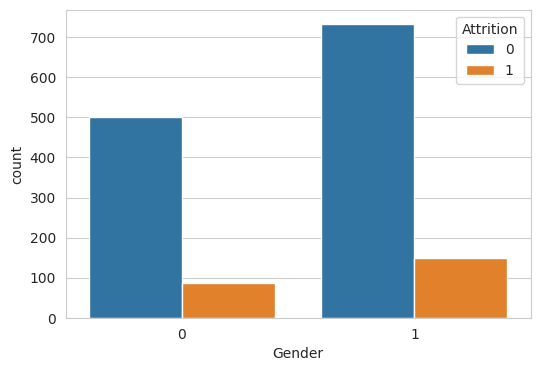

In [ ]:
# so if we see gender wise on people leaving the company, we can see that Male employees are quitting the company more
# compared to female employees.

plt.subplots(figsize=(6,4))
sns.countplot(x='Gender',hue='Attrition',data=data);

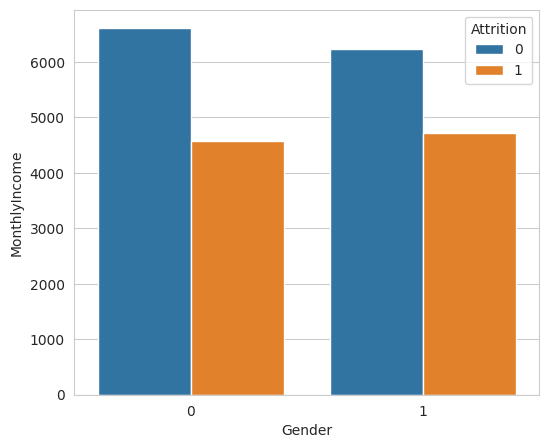

In [ ]:
# in this graph we can say that the employees getting monthly salary less than 5000 are prone to quit the company more.
# for clear picture lets plot another plot.

plt.subplots(figsize=(6,5))
sns.barplot(x='Gender',y='MonthlyIncome',hue='Attrition',data=data,ci=False);

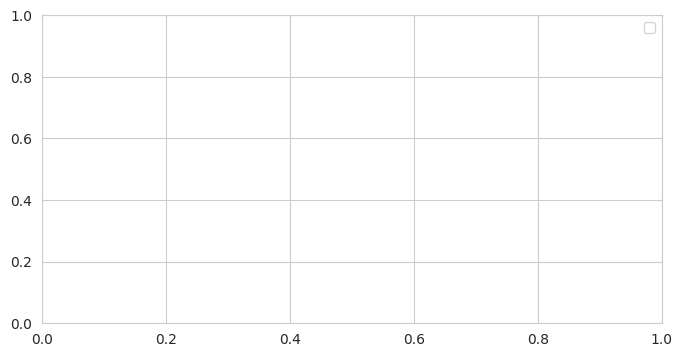

In [ ]:
# we can say that employees getting salary less than 5000 are quitting the company, compared to other employees
# getting salary more than 5000 per month.

plt.subplots(figsize=(8,4))
sns.kdeplot(data.loc[data.Attrition=='No','MonthlyIncome'],label='Current Employees')
sns.kdeplot(data.loc[data.Attrition=='Yes','MonthlyIncome'],label='Ex-Employees')
plt.legend();

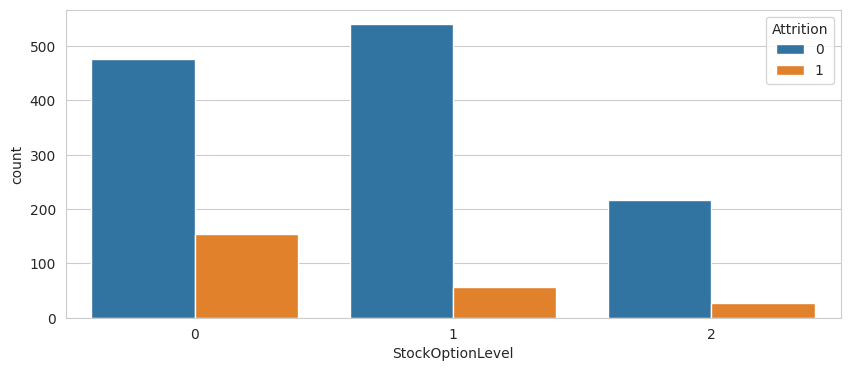

In [ ]:
# people who are not getting any stocks has quit the company more in number compared to emloyees getting company stocks.

plt.subplots(figsize=(10,4))
sns.countplot(x='StockOptionLevel',hue='Attrition',data=data);

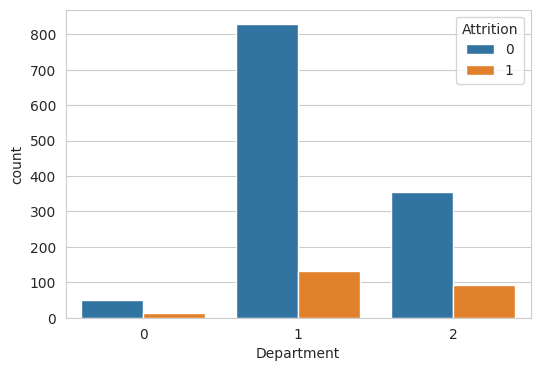

In [ ]:
# lets try and check department wise attrition, if we observe correctly, employees that quitting are more in numbers from R&D,
# followed by Sales. And very less in number from HR dept.

plt.subplots(figsize=(6,4))
sns.countplot(x='Department',hue='Attrition',data=data);

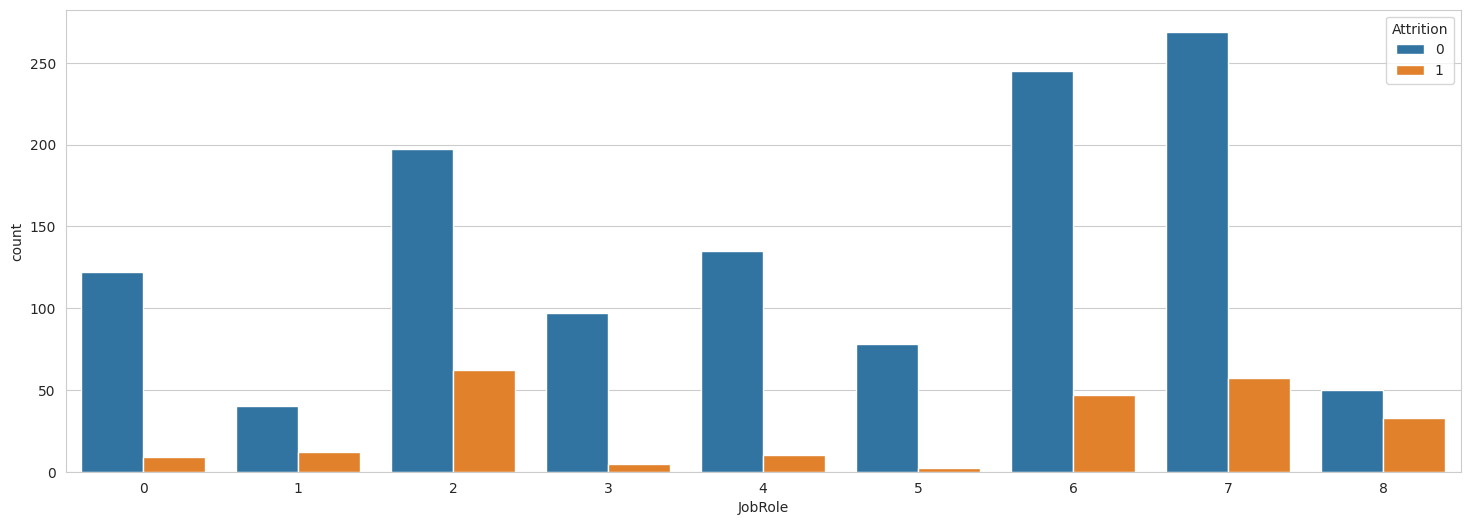

In [ ]:
# so here we can see that Laboratory Technicians are quitting more in number followed by Sales Executives, Research Scientists,
# Sales Representatives, Human Resources. Attrition is least for Research Director roles and Managers.

plt.subplots(figsize=(18,6))
sns.countplot(x='JobRole',hue='Attrition',data=data);

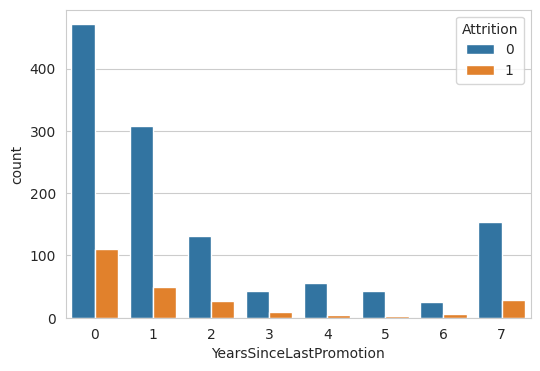

In [ ]:
# people are leaving the company as soon as they get promoted, followed by 1 year after promotion.
# And also people who are not promoted from >= 7 years are also leaving the company.

plt.subplots(figsize=(6,4))
sns.countplot(x='YearsSinceLastPromotion',hue='Attrition',data=data);

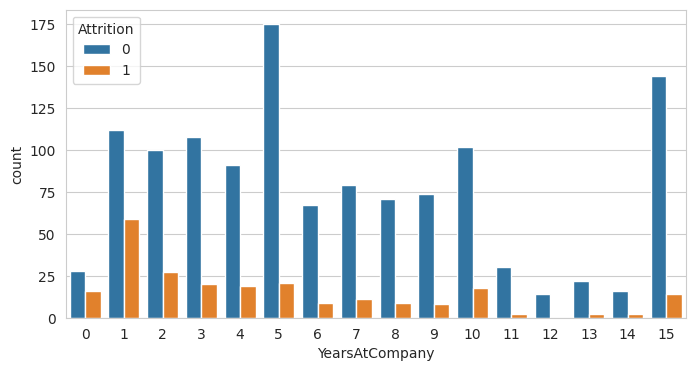

In [ ]:
# employees are leaving in early stages of there time in the company, like people who has been for an year or less than that
# are leaving the company more.

plt.subplots(figsize=(8,4))
sns.countplot(x='YearsAtCompany',hue='Attrition',data=data);

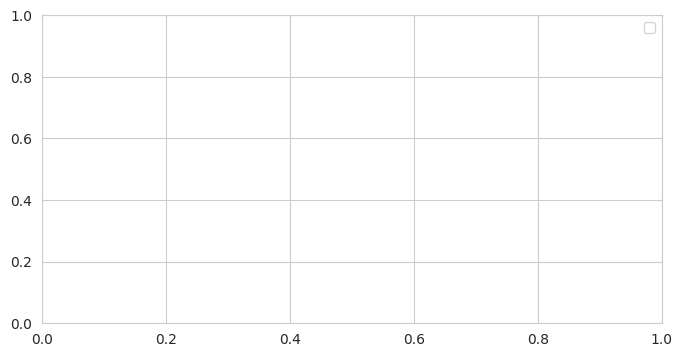

In [ ]:
# here we can say that employees who are paid 40-65 hourly are prone to leave the company more,compared to other hourly payment.

plt.subplots(figsize=(8,4))
sns.kdeplot(data.loc[data.Attrition=='No','HourlyRate'],label='Current Employees')
sns.kdeplot(data.loc[data.Attrition=='Yes','HourlyRate'],label='Ex-Employees')
plt.legend();

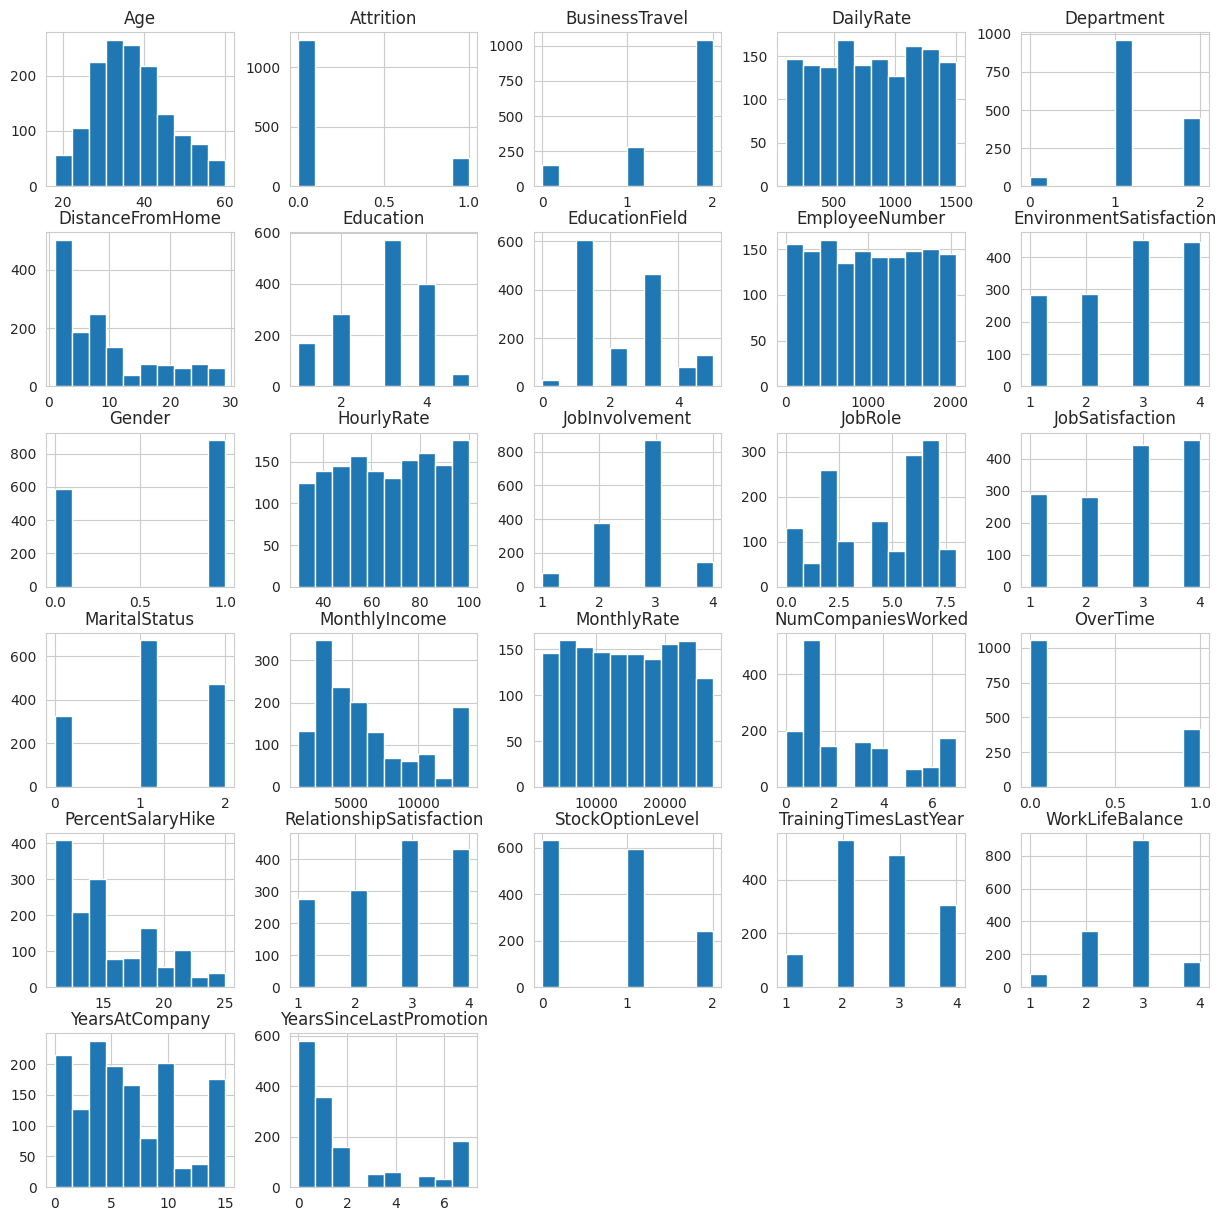

In [ ]:
# gives basic understanding of all the numerical data.

data.hist(figsize=(15,15));

# Model Building

**Data Preprocessing**

In [ ]:
data_hr = data

In [ ]:
# converting the categorical data to numerical using label encoder technique.

def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()

    res_df['Attrition'] = le.fit_transform(res_df['Attrition'])
    res_df['BusinessTravel'] = le.fit_transform(res_df['BusinessTravel'])
    res_df['Department'] = le.fit_transform(res_df['Department'])
    res_df['EducationField'] = le.fit_transform(res_df['EducationField'])
    res_df['Gender'] = le.fit_transform(res_df['Gender'])
    res_df['JobRole'] = le.fit_transform(res_df['JobRole'])
    res_df['MaritalStatus'] = le.fit_transform(res_df['MaritalStatus'])
    res_df['OverTime'] = le.fit_transform(res_df['OverTime'])
    return res_df

In [ ]:
encoded_df = preprocessor(data_hr)

X = encoded_df.drop(['Attrition'],axis =1).values
y = encoded_df['Attrition'].values
encoded_df.shape

(1470, 27)

In [ ]:
encoded_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,1,2,1102,2,1,2,1,1,2,...,19479,7,1,11,1,0,1,1,6,0
1,49,0,1,279,1,8,1,1,2,3,...,24907,1,0,23,4,1,3,3,10,1
2,37,1,2,1373,1,2,2,4,4,4,...,2396,6,1,15,2,0,3,3,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,23159,1,1,11,3,0,3,3,8,3
4,27,0,2,591,1,2,1,3,7,1,...,16632,7,0,12,4,1,3,3,2,2


In [ ]:
# here we can see that all categorical datatypes are converted to numerical datatypes after encoding.

encoded_df.dtypes

,0
Age,int64
Attrition,int64
BusinessTravel,int64
DailyRate,int64
Department,int64
DistanceFromHome,int64
Education,int64
EducationField,int64
EmployeeNumber,int64
EnvironmentSatisfaction,int64


In [ ]:
# converting the dataset into standard noral distribution using StandardScaler module.

sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
# to calculate mean and standard deviation of first 2 features after the standard scaler conversion which should be close to mean = o and SD= 1

mean = np.mean(X, axis=0)
print('Mean: (%d, %d)' % (mean[0], mean[1]))
standard_deviation = np.std(X, axis=0)
print('Standard deviation: (%d, %d)' % (standard_deviation[0], standard_deviation[1]))

Mean: (0, 0)
Standard deviation: (1, 1)


In [ ]:
# splitting the model into 80:20 into training and testing data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

**Logistic Regression ML Model**

In [ ]:
# instantiate the logistic reg model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data, Trains the model on the training data,
logreg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=logreg.predict(X_test)

In [ ]:
# accuracy check

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[238,  11],
       [ 32,  13]])

In [ ]:
plt.rcParams['figure.figsize'] = [4,3]

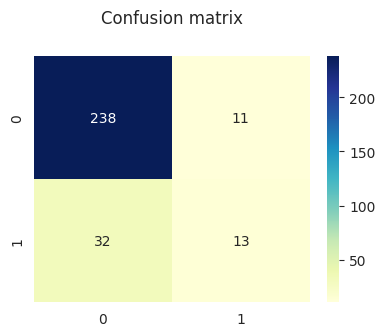

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1);
# plt.ylabel('Actual label')
# plt.xlabel('Predicted label');

In [ ]:
# prints accuracy, precision and recall percentages based on predictions of test data set.

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8537414965986394
Precision: 0.5416666666666666
Recall: 0.28888888888888886


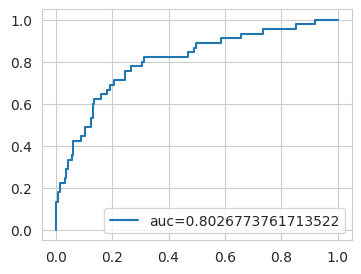

In [ ]:
# AUC graph

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# lets try and find best parameters using GridSearchCV

logreg_best = LogisticRegression(random_state=50)

In [ ]:
import time
np.random.seed(42)
start = time.time()

param_dist = {'solver': ['newton-cg','liblinear'],
              'penalty': ['l1','l2','elasticnet',None],
              'C': np.logspace(-4.5,4.5,50),
              'class_weight': ['balanced'],
              'tol': [0.01,0.1,1,10,100],
              'fit_intercept': [True,False],
              'intercept_scaling': [1,2,3] }

cv_best = GridSearchCV(logreg_best, cv = 10,
                     param_grid=param_dist,
                     verbose = 0,
                     scoring = 'roc_auc',
                     n_jobs = 3,
                     return_train_score=True)

cv_best.fit(X_train, y_train)
print('Best Parameters using grid search: \n', cv_best.best_params_)
print('Best Parameters using grid search: \n', cv_best.best_score_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'C': 0.22758459260747887, 'class_weight': 'balanced', 'fit_intercept': True, 'intercept_scaling': 3, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 1}
Best Parameters using grid search: 
 0.8145541613774696
Time taken in grid search:  681.75


In [ ]:
y_pred_best=logreg.predict(X_test)

In [ ]:
cnf_matrix_best = confusion_matrix(y_test, y_pred_best)
cnf_matrix_best

array([[238,  11],
       [ 32,  13]])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_best))
print("Precision:",metrics.precision_score(y_test, y_pred_best))
print("Recall:",metrics.recall_score(y_test, y_pred_best))

Accuracy: 0.8537414965986394
Precision: 0.5416666666666666
Recall: 0.28888888888888886


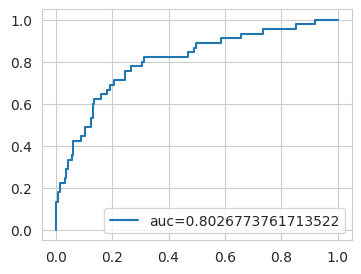

In [ ]:
# we can see that GridSearchCV is also giving the same results as our hit and try method. So the accuracy and AUC is
# similar in both cases.

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc_lr = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc_lr))
plt.legend(loc=4)
plt.show()

**Naive Bayes ML Model**

In [ ]:
X_nb = encoded_df.drop(['Attrition'],axis =1).values
y_nb = encoded_df['Attrition'].values

In [ ]:
mc = StandardScaler()
X_nb = mc.fit_transform(X_nb)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_nb, y_nb, test_size = 0.2, random_state = 101,stratify=y)

In [ ]:
hr_model = GaussianNB().fit(X_train,y_train)

In [ ]:
hr_model

GaussianNB()

In [ ]:
predictions = hr_model.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       247
           1       0.52      0.47      0.49        47

    accuracy                           0.85       294
   macro avg       0.71      0.69      0.70       294
weighted avg       0.84      0.85      0.84       294



In [ ]:
cnf_matrix_nb = confusion_matrix(y_test,predictions)
cnf_matrix_nb

array([[227,  20],
       [ 25,  22]])

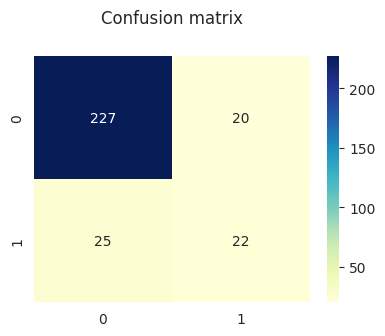

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_nb), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1);
# plt.ylabel('Actual label')
# plt.xlabel('Predicted label');

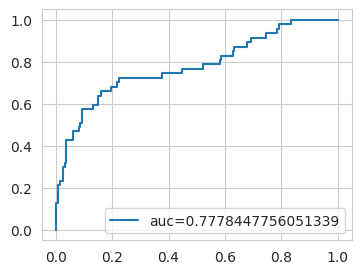

In [ ]:
y_pred_proba = hr_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc_nb = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc_nb))
plt.legend(loc=4)
plt.show()

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

Accuracy: 0.8469387755102041
Precision: 0.5238095238095238
Recall: 0.46808510638297873


**SVM ML Model**

In [ ]:
X_svm = encoded_df.drop(['Attrition'],axis =1).values
y_svm = encoded_df['Attrition'].values

In [ ]:
mc = StandardScaler()
X_svm = mc.fit_transform(X_svm)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_svm, y_svm, test_size = 0.2, random_state = 101)

In [ ]:
svm_model= SVC(probability=True)

In [ ]:
tuned_parameters = {
 #  'C': (np.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf'],
 'degree': [3,4,5,6,7,8] ,'gamma':[0.04,0.05,0.06,0.07,0.08,0.09],
    'C':(np.arange(0.3,1.2,0.1)) , 'kernel':['poly','rbf','linear']
                   }

In [ ]:
model_svm = GridSearchCV(svm_model, tuned_parameters,cv=5,scoring='accuracy',n_jobs=3)

In [ ]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

0.8622538766678687


In [ ]:
print(model_svm.best_params_)

{'C': 0.5, 'degree': 3, 'gamma': 0.04, 'kernel': 'linear'}


In [ ]:
y_pred_svm = model_svm.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))
print("Precision:",metrics.precision_score(y_test, y_pred_svm))
print("Recall:",metrics.recall_score(y_test, y_pred_svm))

Accuracy: 0.8605442176870748
Precision: 0.6111111111111112
Recall: 0.24444444444444444


In [ ]:
cnf_matrix_svm = confusion_matrix(y_test,y_pred_svm)
cnf_matrix_svm

array([[242,   7],
       [ 34,  11]])

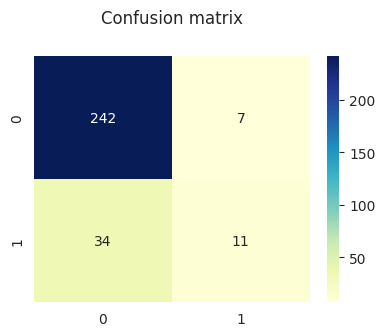

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_svm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1);
# plt.ylabel('Actual label')
# plt.xlabel('Predicted label');

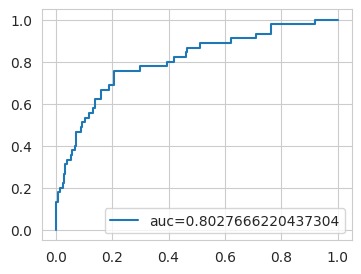

In [ ]:
y_pred_proba = model_svm.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc_svm = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc_svm))
plt.legend(loc=4)
plt.show()

**Randome Forest ML Model**

In [ ]:
X_rf = encoded_df.drop(['Attrition'],axis =1).values
y_rf = encoded_df['Attrition'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size = 0.2, random_state = 101)

In [ ]:
fit_rf = RandomForestClassifier(random_state=42)

In [ ]:
import time

np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [15,16,17,18],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf':[5,6,7,8,9],
              'min_samples_split':[10,20,30,40],
              'n_estimators':[10,20,30,40]}

cv_rf = GridSearchCV(fit_rf, cv = 5,
                     param_grid=param_dist,
                     n_jobs = 3)

cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 6, 'min_samples_split': 20, 'n_estimators': 10}
Time taken in grid search:  2007.70


In [ ]:


fit_rf.set_params(criterion = 'entropy',
                  max_features = 'auto',
                  max_depth = 17,
                  bootstrap = False,
                  min_samples_leaf = 5,
                  min_samples_split = 10,
                  n_estimators = 30)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=17,
                       max_features='auto', min_samples_leaf=5,
                       min_samples_split=10, n_estimators=30, random_state=42)

In [ ]:
fit_rf.set_params(criterion = 'entropy',
                  max_features = None,
                  max_depth = 17,
                  bootstrap = False,
                  min_samples_leaf = 5,
                  min_samples_split = 10,
                  n_estimators = 30)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=17,
                       max_features=None, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=30, random_state=42)

In [ ]:
# Fit the model to your training data
fit_rf.fit(X_train, y_train)

# Now you can make predictions
y_pred_rf = fit_rf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision:",metrics.precision_score(y_test, y_pred_rf))
print("Recall:",metrics.recall_score(y_test, y_pred_rf))

Accuracy: 0.8061224489795918
Precision: 0.3235294117647059
Recall: 0.24444444444444444


In [ ]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       249
           1       0.32      0.24      0.28        45

    accuracy                           0.81       294
   macro avg       0.60      0.58      0.58       294
weighted avg       0.79      0.81      0.79       294



In [ ]:
cnf_matrix_rf = confusion_matrix(y_test,y_pred_rf)
cnf_matrix_rf

array([[226,  23],
       [ 34,  11]])

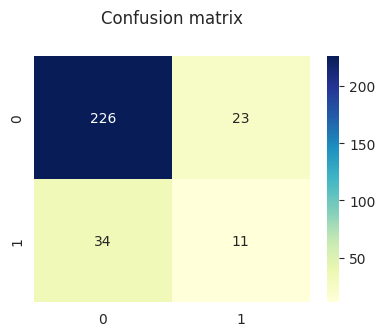

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_rf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1);
# plt.ylabel('Actual label')
# plt.xlabel('Predicted label');

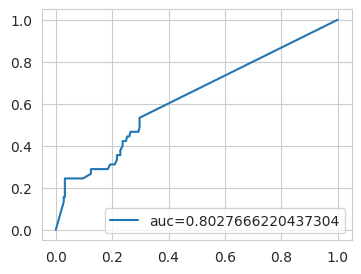

In [ ]:
y_pred_proba = fit_rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc_rf  = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc_svm))
plt.legend(loc=4)
plt.show()

In [ ]:
# Now lets check for accuracy of all the models.

print("Accuracy of SVM Model:",metrics.accuracy_score(y_test, y_pred_svm))
print("Accuracy of Random Forest Model:",metrics.accuracy_score(y_test, y_pred_rf))
print("Accuracy of Logistic Regression Model:",metrics.accuracy_score(y_test, y_pred_best))
print("Accuracy of Naive Bayes Model:",metrics.accuracy_score(y_test, predictions))

# we can clearly see that SVM Model is giving more accuracy compared to any other model. So according to the model accuracy
# SVM would serve as a best fit model for HR Attrition Prediction, followed by Random Forest model.

Accuracy of SVM Model: 0.8605442176870748
Accuracy of Random Forest Model: 0.8061224489795918
Accuracy of Logistic Regression Model: 0.8537414965986394
Accuracy of Naive Bayes Model: 0.7380952380952381


In [ ]:
# Now lets check for AUC of all the models.

print("AUC for SVM Model:",auc_svm)
print("AUC for Random Forest Model:",auc_rf)
print("AUC for Logistic Regression Model:",auc_lr)
print("AUC for Naive Bayes Model:",auc_nb)

# we can clearly see that for SVM Model AUC is high compared to any other model. So according to the AUC of the models,
# SVM would serve as a best fit model for HR Attrition Prediction, followed by Random Forest model.

AUC for SVM Model: 0.8027666220437304
AUC for Random Forest Model: 0.6262829094154396
AUC for Logistic Regression Model: 0.8026773761713522
AUC for Naive Bayes Model: 0.7778447756051339
